In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## First 5 rows

In [2]:
train_df = pd.read_csv("/content/train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **1. EDA on Train Dataset**

## Data types of all columns

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Since people belonging to 3rd class had very high number of male entries, it may cause bias while taking mean of entire column and hence I considered mean of same Pclass

In [4]:
train_df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [5]:
# reaplcing nan value in Age with mean of the same Pclass
# train_df['Age'] = train_df['Age'].fillna(
#     train_df.groupby('Pclass')['Age'].transform('mean')
# )

In [6]:
# # reaplcing nan value in Age with mean
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)

In [7]:
# replacing nan on embarked with mode
train_df.drop(columns='Cabin', inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

In [8]:
train_df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [9]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [10]:
# No of people survived
train_df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [11]:
train_df['Ticket'].nunique()

681

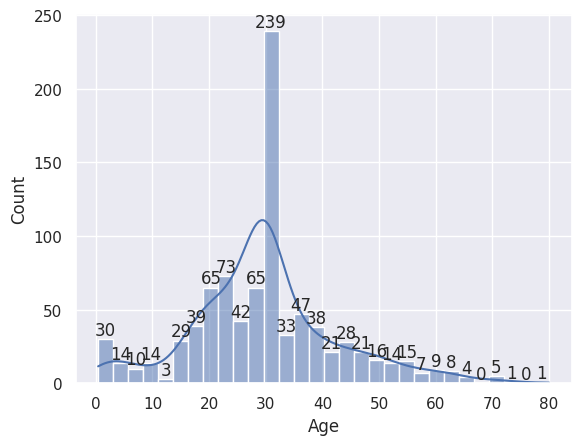

In [12]:
sns.set()
ax = sns.histplot(x='Age',data=train_df,palette='Set2',kde=True)
for container in ax.containers:
  ax.bar_label(container)
plt.show()

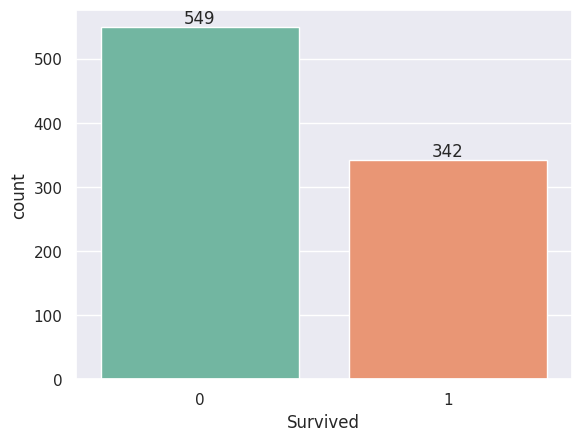

In [13]:
import matplotlib.pyplot as plt
ax = sns.countplot(x='Survived', data=train_df,palette='Set2')
for container in ax.containers:
  ax.bar_label(container)
plt.show()

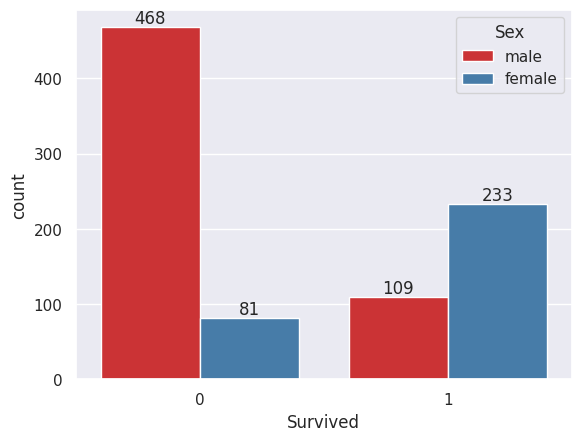

In [14]:
ax = sns.countplot(x='Survived', hue='Sex', data=train_df, palette='Set1')
for container in ax.containers:
  ax.bar_label(container)
plt.show()

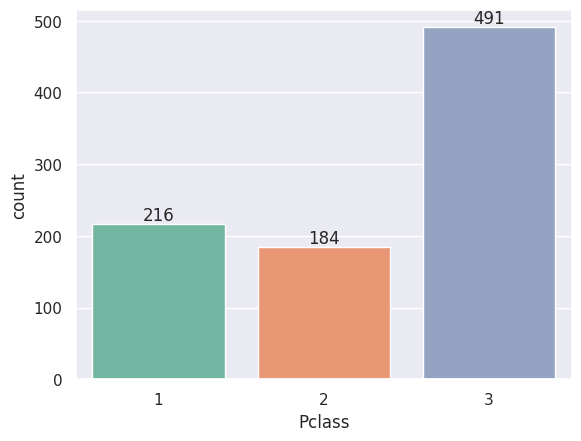

In [15]:
ax = sns.countplot(x='Pclass', data=train_df, palette='Set2')
for container in ax.containers:
  ax.bar_label(container)
plt.show()

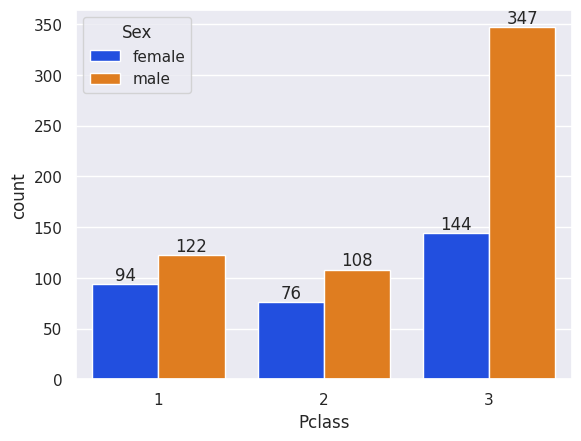

In [16]:
ax = sns.countplot(x='Pclass', hue='Sex', data=train_df, palette='bright')
for container in ax.containers:
  ax.bar_label(container)
plt.show()

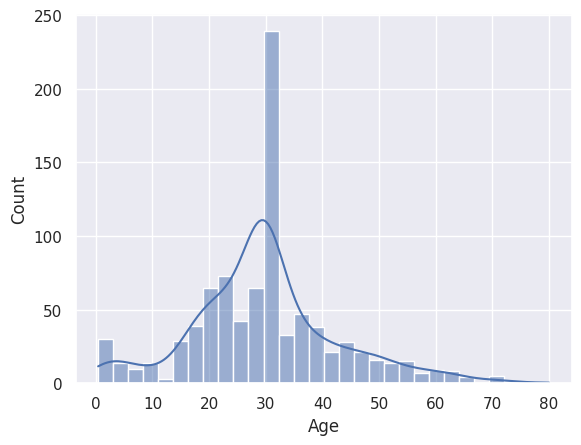

In [17]:
ax = sns.histplot(x='Age', data=train_df, kde=True, palette='Set3')
plt.show()

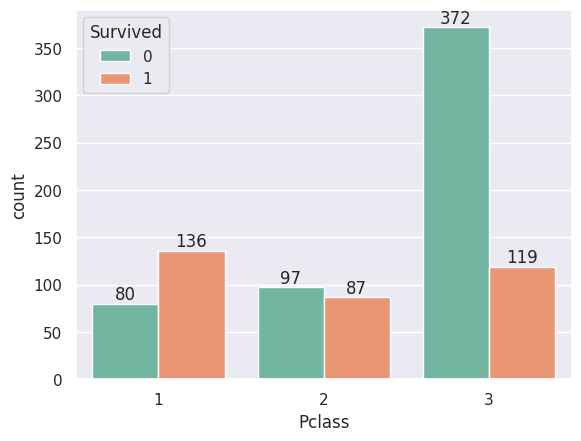

In [18]:
ax = sns.countplot(x='Pclass',hue='Survived', data=train_df, palette='Set2')
for container in ax.containers:
  ax.bar_label(container)
plt.show()

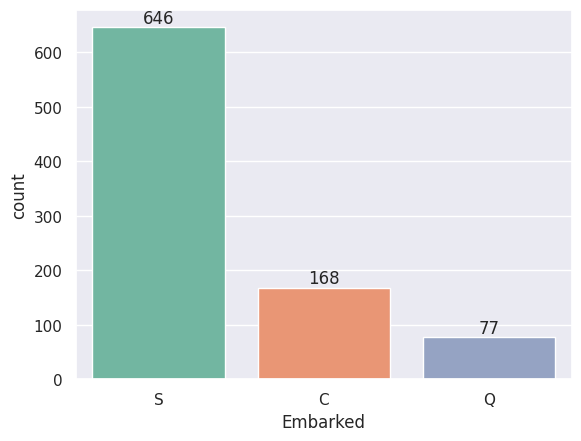

In [19]:
ax = sns.countplot(x='Embarked', data=train_df, palette='Set2')
for container in ax.containers:
  ax.bar_label(container)
plt.show()

Text(0.5, 1.0, '6. Distribution of survival with respect to Pclass')

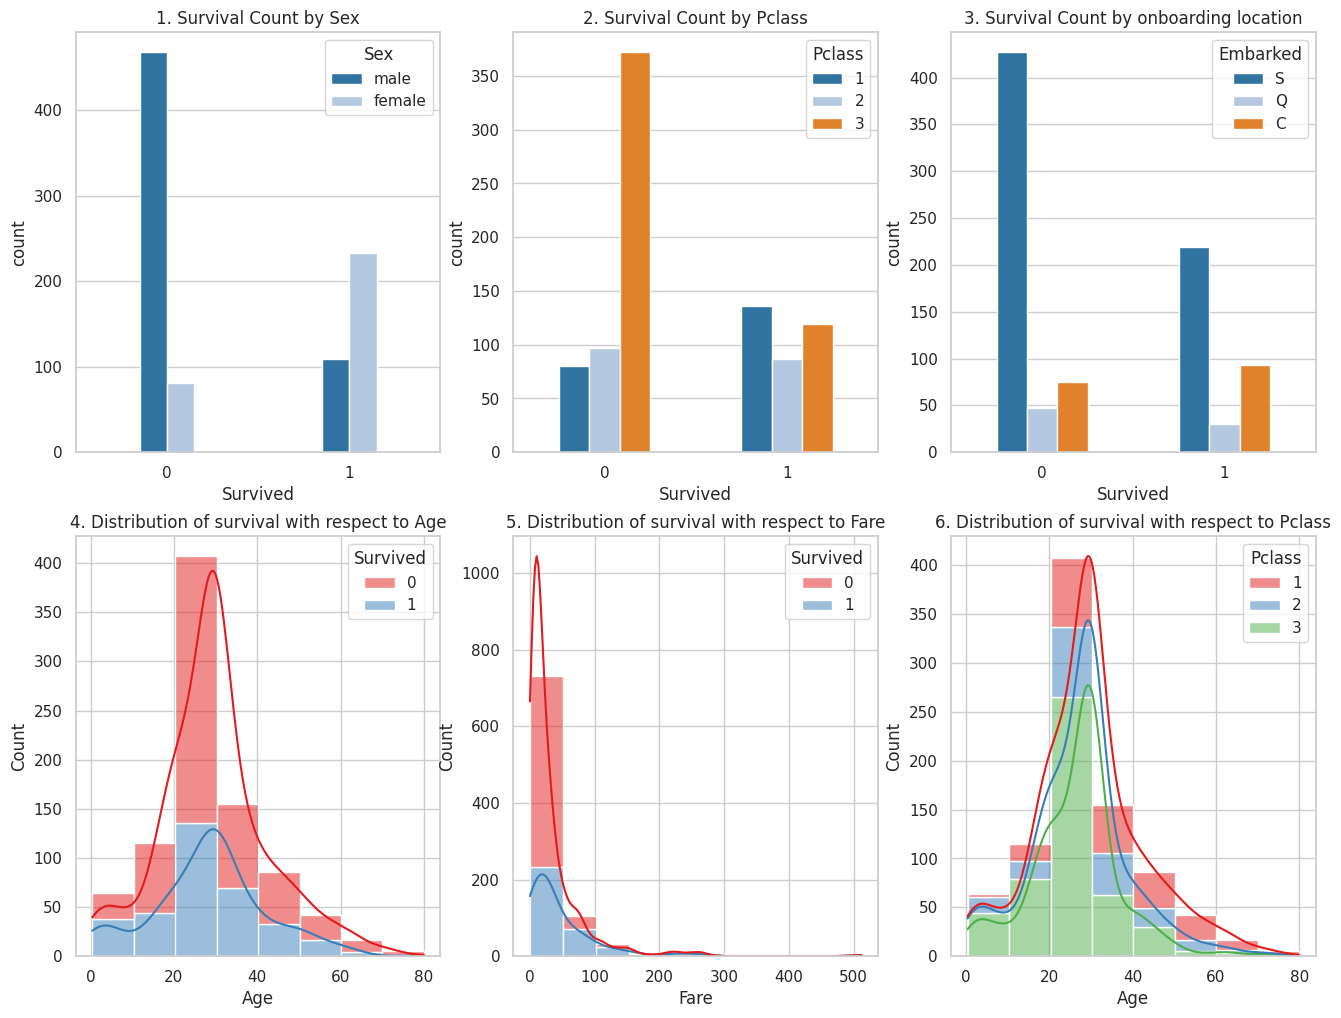

In [20]:
sns.set(style="whitegrid")
plt.figure(figsize=(16,12))

# sex vs survival rate:
plt.subplot(2,3,1)
sns.countplot(train_df,x='Survived',hue='Sex',palette='tab20',width=0.3)
plt.title('1. Survival Count by Sex')

# Passenger class vs survival rate:
plt.subplot(2,3,2)
sns.countplot(x="Survived", hue="Pclass", data=train_df, palette="tab20",width=0.5)
plt.title('2. Survival Count by Pclass')

# Siblings vs survival rate:
plt.subplot(2,3,3)
sns.countplot(x="Survived", hue="Embarked", data=train_df, palette="tab20",width=0.5)
plt.title('3. Survival Count by onboarding location')

# Onboarding location vs survival rate:
plt.subplot(2,3,4)
sns.histplot(data=train_df,x='Age',hue='Survived',bins=8,multiple='stack',kde=True, palette='Set1')
plt.title('4. Distribution of survival with respect to Age')

# Age vs survival rate:
plt.subplot(2,3,5)
sns.histplot(data=train_df, x="Fare", hue="Survived", bins=10,multiple='stack',kde=True,palette='Set1')
plt.title('5. Distribution of survival with respect to Fare')

# Ticket Fare vs survival rate:
plt.subplot(2,3,6)
sns.histplot(train_df, x='Age', hue='Pclass',bins=8,multiple='stack',kde=True,palette='Set1')
plt.title('6. Distribution of survival with respect to Pclass')

# **Feature Engineering**

In [21]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


Transforming Train_df in order to be suitable for Logistic regression

In [22]:
# Can Be Removed
# new columns
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch']

In [23]:
train_df['Women_Child'] = ((train_df['Age'] < 18) | (train_df['Sex'] == 'female')).astype(int)

In [24]:
train_df['FarePerPerson'] = train_df['Fare'] / (train_df['FamilySize'] + 1)

In [25]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,Women_Child,FarePerPerson
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,1,0,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,1,1,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0,1,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,1,1,26.55000
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,0,0,8.05000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,0,0,13.00000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,0,1,30.00000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,3,1,5.86250
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,0,0,30.00000


In [26]:
# Converting categorical variables into numerical variables
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
train_df['Embarked'] = train_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Dropping unnecessary columns
train_copy = train_df.drop(columns=['Name', 'Ticket', 'PassengerId'])

# Display the transformed dataframe
train_copy.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Women_Child,FarePerPerson
0,0,3,0,22.0,1,0,7.2500,0,1,0,3.62500
1,1,1,1,38.0,1,0,71.2833,1,1,1,35.64165
2,1,3,1,26.0,0,0,7.9250,0,0,1,7.92500
3,1,1,1,35.0,1,0,53.1000,0,1,1,26.55000
4,0,3,0,35.0,0,0,8.0500,0,0,0,8.05000


In [27]:
X = train_copy.drop(columns=['Survived'])
y = train_copy['Survived']

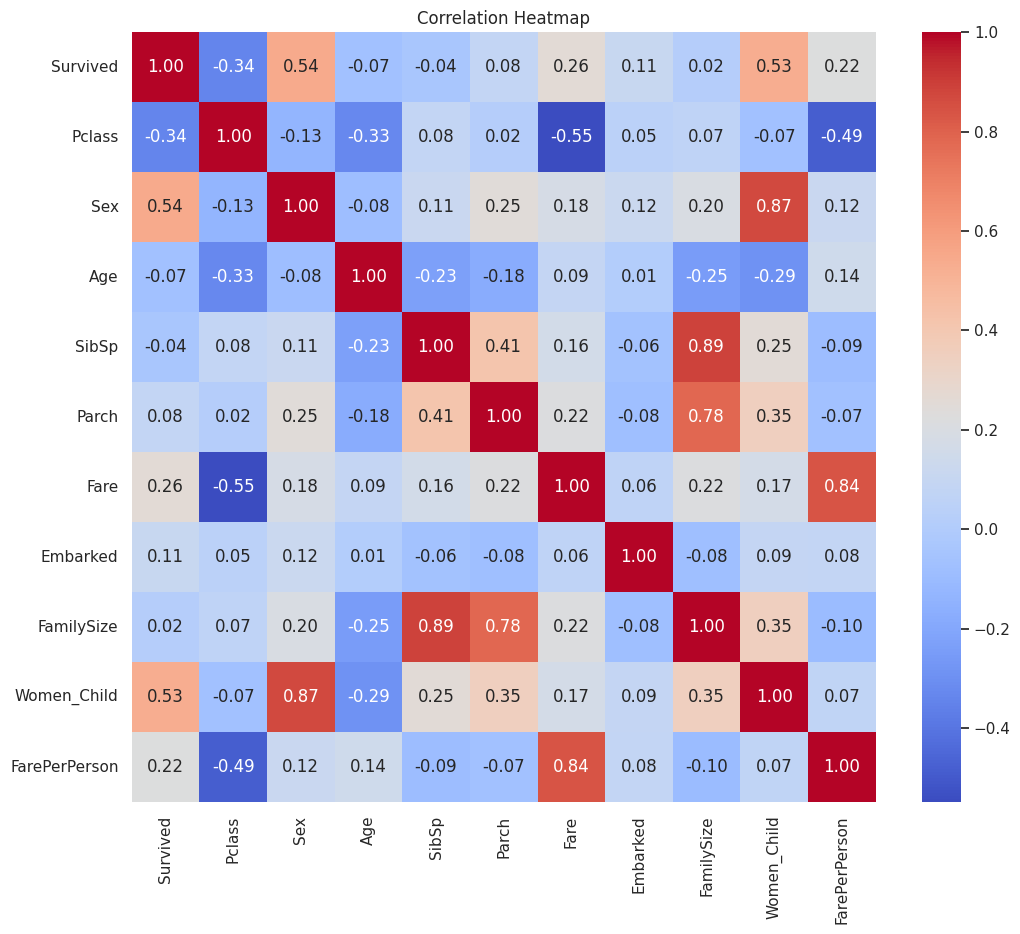

In [28]:
import matplotlib.pyplot as plt
corr = train_copy.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# **Model Setup and Training**

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=90)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(penalty='l1', C=1.0, solver='liblinear')
model.fit(X_train_scaled, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [30]:
y_pred = model.predict(X_test_scaled)

In [31]:
acc_score = accuracy_score(y_test, y_pred)
print("Accuracy Score on Train Data:", acc_score)

Accuracy Score on Train Data: 0.8100558659217877


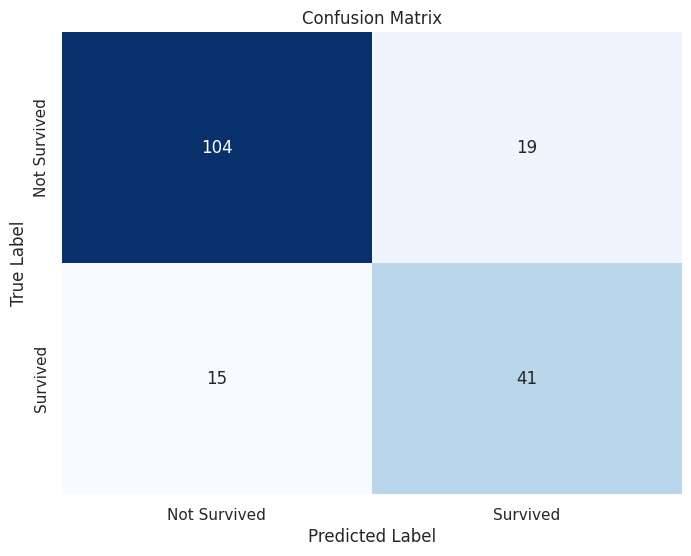

In [32]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       123
           1       0.68      0.73      0.71        56

    accuracy                           0.81       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.81      0.81      0.81       179



In [34]:
from sklearn.model_selection import cross_val_score
# Evaluate bias and variance using cross-validation
scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-validation Accuracy Scores:", scores)
print("Mean Cross-validation Accuracy:", scores.mean())
print("Standard Deviation of Cross-validation Accuracy:", scores.std())
# Interpretation:
# Low bias is indicated by a high mean accuracy score across the cross-validation folds.
# Low variance is indicated by a low standard deviation of the accuracy scores across the folds.

# You can also compare the training accuracy and test accuracy:
train_accuracy = model.score(X_train_scaled, y_train)
test_accuracy = model.score(X_test_scaled, y_test)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
# If training accuracy is much higher than test accuracy, it suggests high variance (overfitting).
# If both training and test accuracy are low, it suggests high bias (underfitting).

Cross-validation Accuracy Scores: [0.83216783 0.78321678 0.79577465 0.82394366 0.78169014]
Mean Cross-validation Accuracy: 0.8033586132177681
Standard Deviation of Cross-validation Accuracy: 0.020911469912984093
Training Accuracy: 0.8117977528089888
Test Accuracy: 0.8100558659217877


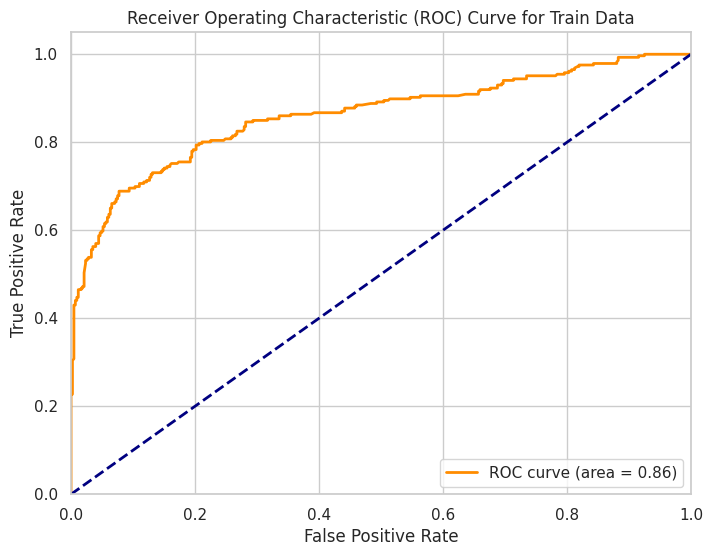

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Generate ROC curve for the training data
y_train_pred_proba = model.predict_proba(X_train_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Train Data')
plt.legend(loc="lower right")
plt.show()

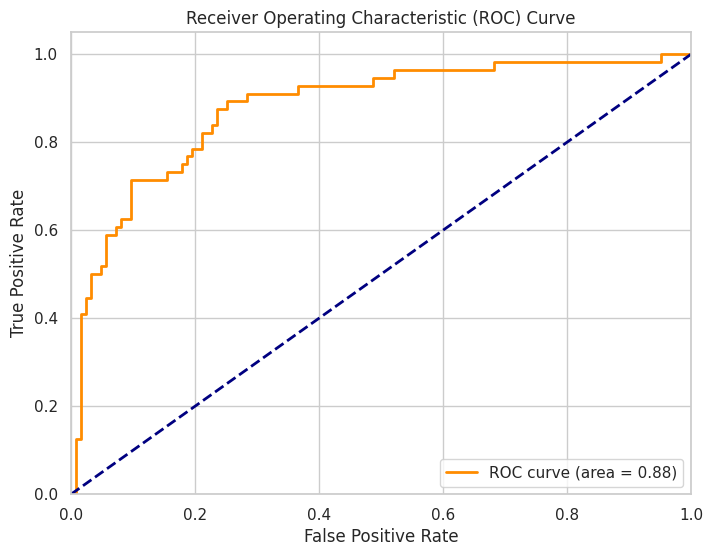

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the positive class (Survived=1)
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

# Generate ROC curve data
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# **Observation**

The above AUC-ROC curve shows an Area Under the Curve (AUC) of **0.86**, which is generally considered a strong performance.

1. Since **Train AUC ≈ Test AUC** and both high, There is NO Overfitting NOR Underfitting

2. After these results, I tried adding new features like ['FamilySize'],  ['DeathAge'] (for age between 20-40, which included most non-survivors),  ['IsMen'] (as most non-survivors were Men).



After 2nd acc_score increased to 0.8156 from 0.81005. But, the accuracy_score in competition decreased from 0.75 to 0.66.

# **Test Data**

In [37]:
test_df = pd.read_csv("/content/test.csv")
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [38]:
test_df.isna().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [39]:
test_df['Age'] = test_df['Age'].fillna(
    test_df.groupby('Pclass')['Age'].transform('mean')
)
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)
test_df.drop(columns='Cabin', inplace=True)

In [40]:
test_df.isna().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


In [41]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,24.027945,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,24.027945,0,0,359309,8.0500,S


In [42]:
test_copy = test_df.drop(['PassengerId','Name','Ticket'],axis=1)
test_copy

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.500000,0,0,7.8292,Q
1,3,female,47.000000,1,0,7.0000,S
2,2,male,62.000000,0,0,9.6875,Q
3,3,male,27.000000,0,0,8.6625,S
4,3,female,22.000000,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,24.027945,0,0,8.0500,S
414,1,female,39.000000,0,0,108.9000,C
415,3,male,38.500000,0,0,7.2500,S
416,3,male,24.027945,0,0,8.0500,S


### **Feature Engineering on Test Dataset**

In [43]:
test_copy

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.500000,0,0,7.8292,Q
1,3,female,47.000000,1,0,7.0000,S
2,2,male,62.000000,0,0,9.6875,Q
3,3,male,27.000000,0,0,8.6625,S
4,3,female,22.000000,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,24.027945,0,0,8.0500,S
414,1,female,39.000000,0,0,108.9000,C
415,3,male,38.500000,0,0,7.2500,S
416,3,male,24.027945,0,0,8.0500,S


In [44]:
# Can be removed
test_copy['FamilySize'] = test_copy['SibSp'] + test_copy['Parch']
test_copy['Women_Child'] = ((test_copy['Age'] < 18) | (test_copy['Sex'] == 'female')).astype(int)
test_copy['FarePerPerson'] = test_copy['Fare'] / (train_copy['FamilySize'] + 1)

In [45]:
# Converting categorical variables into numerical variables
test_copy['Sex'] = test_copy['Sex'].map({'male': 0, 'female': 1})
test_copy['Embarked'] = test_copy['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Display the transformed dataframe
test_copy.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Women_Child,FarePerPerson
0,3,0,34.5,0,0,7.8292,2,0,0,3.91460
1,3,1,47.0,1,0,7.0000,0,1,1,3.50000
2,2,0,62.0,0,0,9.6875,2,0,0,9.68750
3,3,0,27.0,0,0,8.6625,0,0,0,4.33125
4,3,1,22.0,1,1,12.2875,0,2,1,12.28750


In [46]:
y_ans = model.predict(test_copy)

In [47]:
import pandas as pd
results_df = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': y_ans})
results_df.to_csv('submission.csv', index=False)
print("Submission file 'submission.csv' created successfully!")

Submission file 'submission.csv' created successfully!
